# Project title: SONAR Rock vs Mine Prediction
### Group number: 57
### EG/2020/3797 - Aberuwan R. M. M. P.
### EG/2020/4135 - Rajapaksha R. P. D. M.
# --------------------------------------------------------------------------------

### Import libraries

In [1]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical graphics
from scipy import stats  # For scientific computing and statistical functions
from sklearn.preprocessing import StandardScaler  # For data preprocessing
from sklearn.preprocessing import LabelEncoder # For convert categorical data columns to numerical
from sklearn.feature_selection import SelectKBest, f_classif # For feature selection
from sklearn.model_selection import GridSearchCV # For hyperparameter optimization
from sklearn.model_selection import cross_val_score, StratifiedKFold # For cross validation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier model
from sklearn.metrics import accuracy_score  # For evaluating classification accuracy
from sklearn.metrics import confusion_matrix # For confusion matrix

### Dataframe

In [2]:
sonar_data = pd.read_csv('sample_data/SONAR Rock vs Mine Prediction Data.csv', header=None) # Dataframe reads the Sonar data from the CSV file

In [3]:
# Add the column names to your DataFrame
column_names = ["Angle " + str(i) for i in range(1, 61)]
sonar_data.columns = column_names + ["Target"]

In [4]:
sonar_data.head() # Display the first few rows of the Sonar data

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_data.tail() # Display the last few rows of the Sonar data

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [6]:
# Checking the dimensions of the Sonar data
data_shape = sonar_data.shape
print("Number of records:", data_shape[0])
print("Number of angles:", data_shape[1]-1)

Number of records: 208
Number of angles: 60


### Data Analysis

In [7]:
# Get the value counts for the 60th column
sonar_data.iloc[:, 60].value_counts()

M    111
R     97
Name: Target, dtype: int64

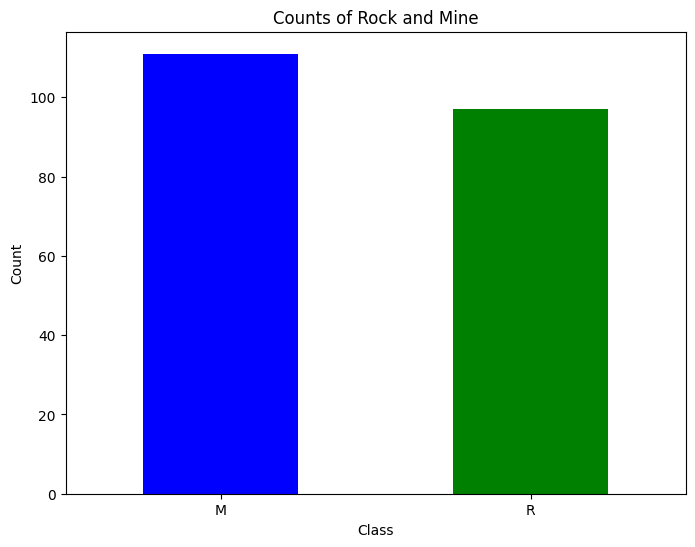

In [8]:
# Plot the counts of data
target_counts = sonar_data['Target'].value_counts()
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Counts of Rock and Mine')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
# Balancing the R & M classes
target_counts = sonar_data['Target'].value_counts()
min_class_count = min(target_counts['M'], target_counts['R'])
balanced_sonar_data = pd.concat([
    sonar_data[sonar_data['Target'] == 'M'].head(min_class_count),
    sonar_data[sonar_data['Target'] == 'R'].head(min_class_count)
])

In [10]:
# Now, balanced_data contains an equal number of 'M' and 'R' records
balanced_sonar_data.iloc[:, 60].value_counts()

M    97
R    97
Name: Target, dtype: int64

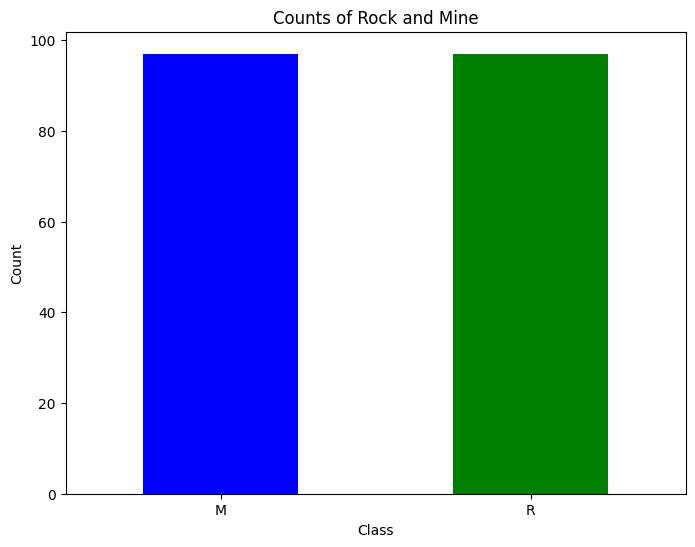

In [11]:
# Plot the counts of data
target_counts = balanced_sonar_data['Target'].value_counts()
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Counts of Rock and Mine')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
# Displaying information about the data
balanced_sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 97 to 96
Data columns (total 61 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Angle 1   194 non-null    float64
 1   Angle 2   194 non-null    float64
 2   Angle 3   194 non-null    float64
 3   Angle 4   194 non-null    float64
 4   Angle 5   194 non-null    float64
 5   Angle 6   194 non-null    float64
 6   Angle 7   194 non-null    float64
 7   Angle 8   194 non-null    float64
 8   Angle 9   194 non-null    float64
 9   Angle 10  194 non-null    float64
 10  Angle 11  194 non-null    float64
 11  Angle 12  194 non-null    float64
 12  Angle 13  194 non-null    float64
 13  Angle 14  194 non-null    float64
 14  Angle 15  194 non-null    float64
 15  Angle 16  194 non-null    float64
 16  Angle 17  194 non-null    float64
 17  Angle 18  194 non-null    float64
 18  Angle 19  194 non-null    float64
 19  Angle 20  194 non-null    float64
 20  Angle 21  194 non-null    float6

In [13]:
# Checking for any null values
null_values = balanced_sonar_data.isnull().sum()
print('Null Values in each column:')
null_values

Null Values in each column:


Angle 1     0
Angle 2     0
Angle 3     0
Angle 4     0
Angle 5     0
           ..
Angle 57    0
Angle 58    0
Angle 59    0
Angle 60    0
Target      0
Length: 61, dtype: int64

There are not any null values.

In [14]:
# Checking for duplicate rows
duplicate_rows = balanced_sonar_data.duplicated().sum()
print('Number of duplicate rows: ', duplicate_rows)

Number of duplicate rows:  0


There are not any duplicates rows.

In [15]:
# Group SONAR data as Rock(R) and Mine(M) and calculate the mean for each group for each angle
balanced_sonar_data.groupby('Target').mean()

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 51,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60
Target,,,,,,,,,,,,,,,,,,,,,
M,0.036303,0.047610,0.053271,0.068585,0.091131,0.114961,0.129748,0.151296,0.216911,0.251077,...,0.019905,0.016602,0.012308,0.012912,0.010704,0.009413,0.008242,0.009667,0.009233,0.007074
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [16]:
# Descriptive statistics
statistics = balanced_sonar_data.describe()
print('Descriptive Statistics:')
statistics

Descriptive Statistics:


,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 51,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.029401,0.038957,0.044611,0.055016,0.076579,0.105592,0.121964,0.134446,0.177152,0.205201,...,0.016108,0.013527,0.010974,0.011215,0.009636,0.008422,0.008028,0.008172,0.008156,0.006549
std,0.023559,0.033743,0.039559,0.047690,0.056719,0.060164,0.063110,0.087553,0.121765,0.138003,...,0.012323,0.009934,0.007195,0.007360,0.007204,0.005845,0.005887,0.006568,0.006231,0.005094
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001100,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013425,0.016525,0.018850,0.024325,0.038425,0.067275,0.077975,0.077325,0.094925,0.105700,...,0.008125,0.007125,0.005250,0.005625,0.004425,0.004525,0.003700,0.003600,0.004300,0.003125
50%,0.022400,0.029850,0.034500,0.044450,0.063000,0.092150,0.106950,0.111200,0.145950,0.176000,...,0.013700,0.011100,0.009950,0.009550,0.007900,0.007200,0.006350,0.006050,0.006800,0.005350
75%,0.036050,0.050450,0.060275,0.068875,0.105875,0.139750,0.154200,0.170950,0.235900,0.271250,...,0.021225,0.017275,0.015175,0.014500,0.012400,0.011325,0.010575,0.010500,0.010575,0.008575
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


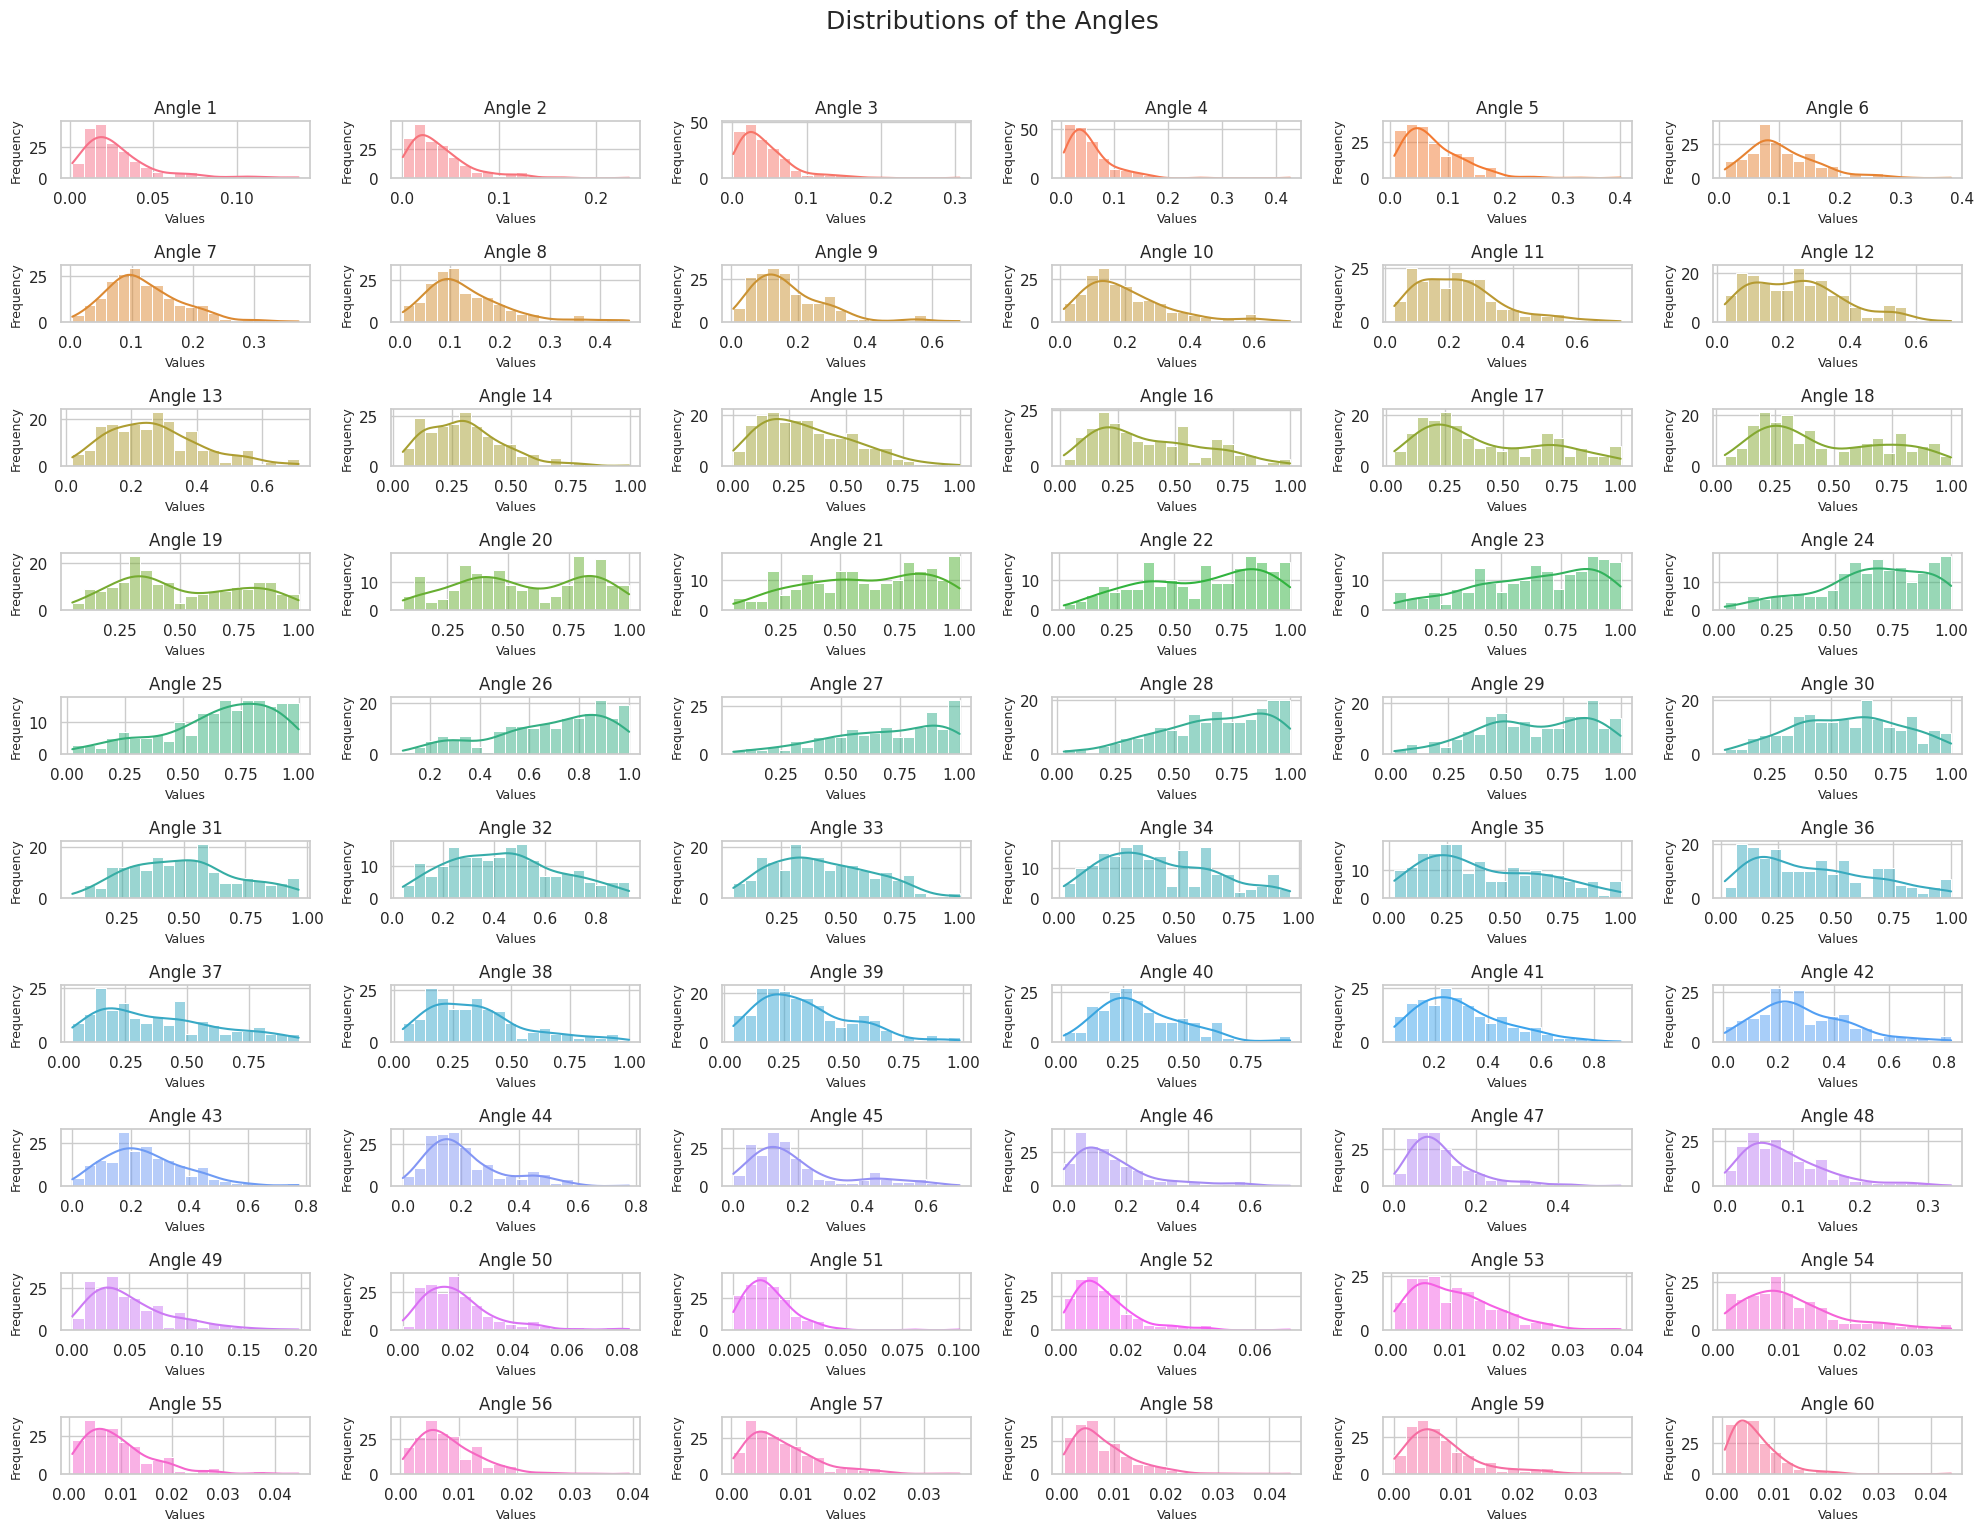

In [17]:
# Plotting distributions of the angles
sns.set(style='whitegrid')
colors = sns.color_palette("husl", 60)
plt.figure(figsize=(20, 15))
for i in range(1, 61):
    plt.subplot(10, 6, i)
    sns.histplot(balanced_sonar_data.iloc[:, i-1], kde=True, bins=20, color=colors[i-1])
    plt.title('Angle ' + str(i))
    plt.xlabel('Values', fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.grid(True)
plt.suptitle('Distributions of the Angles', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

### Data Pre-processing

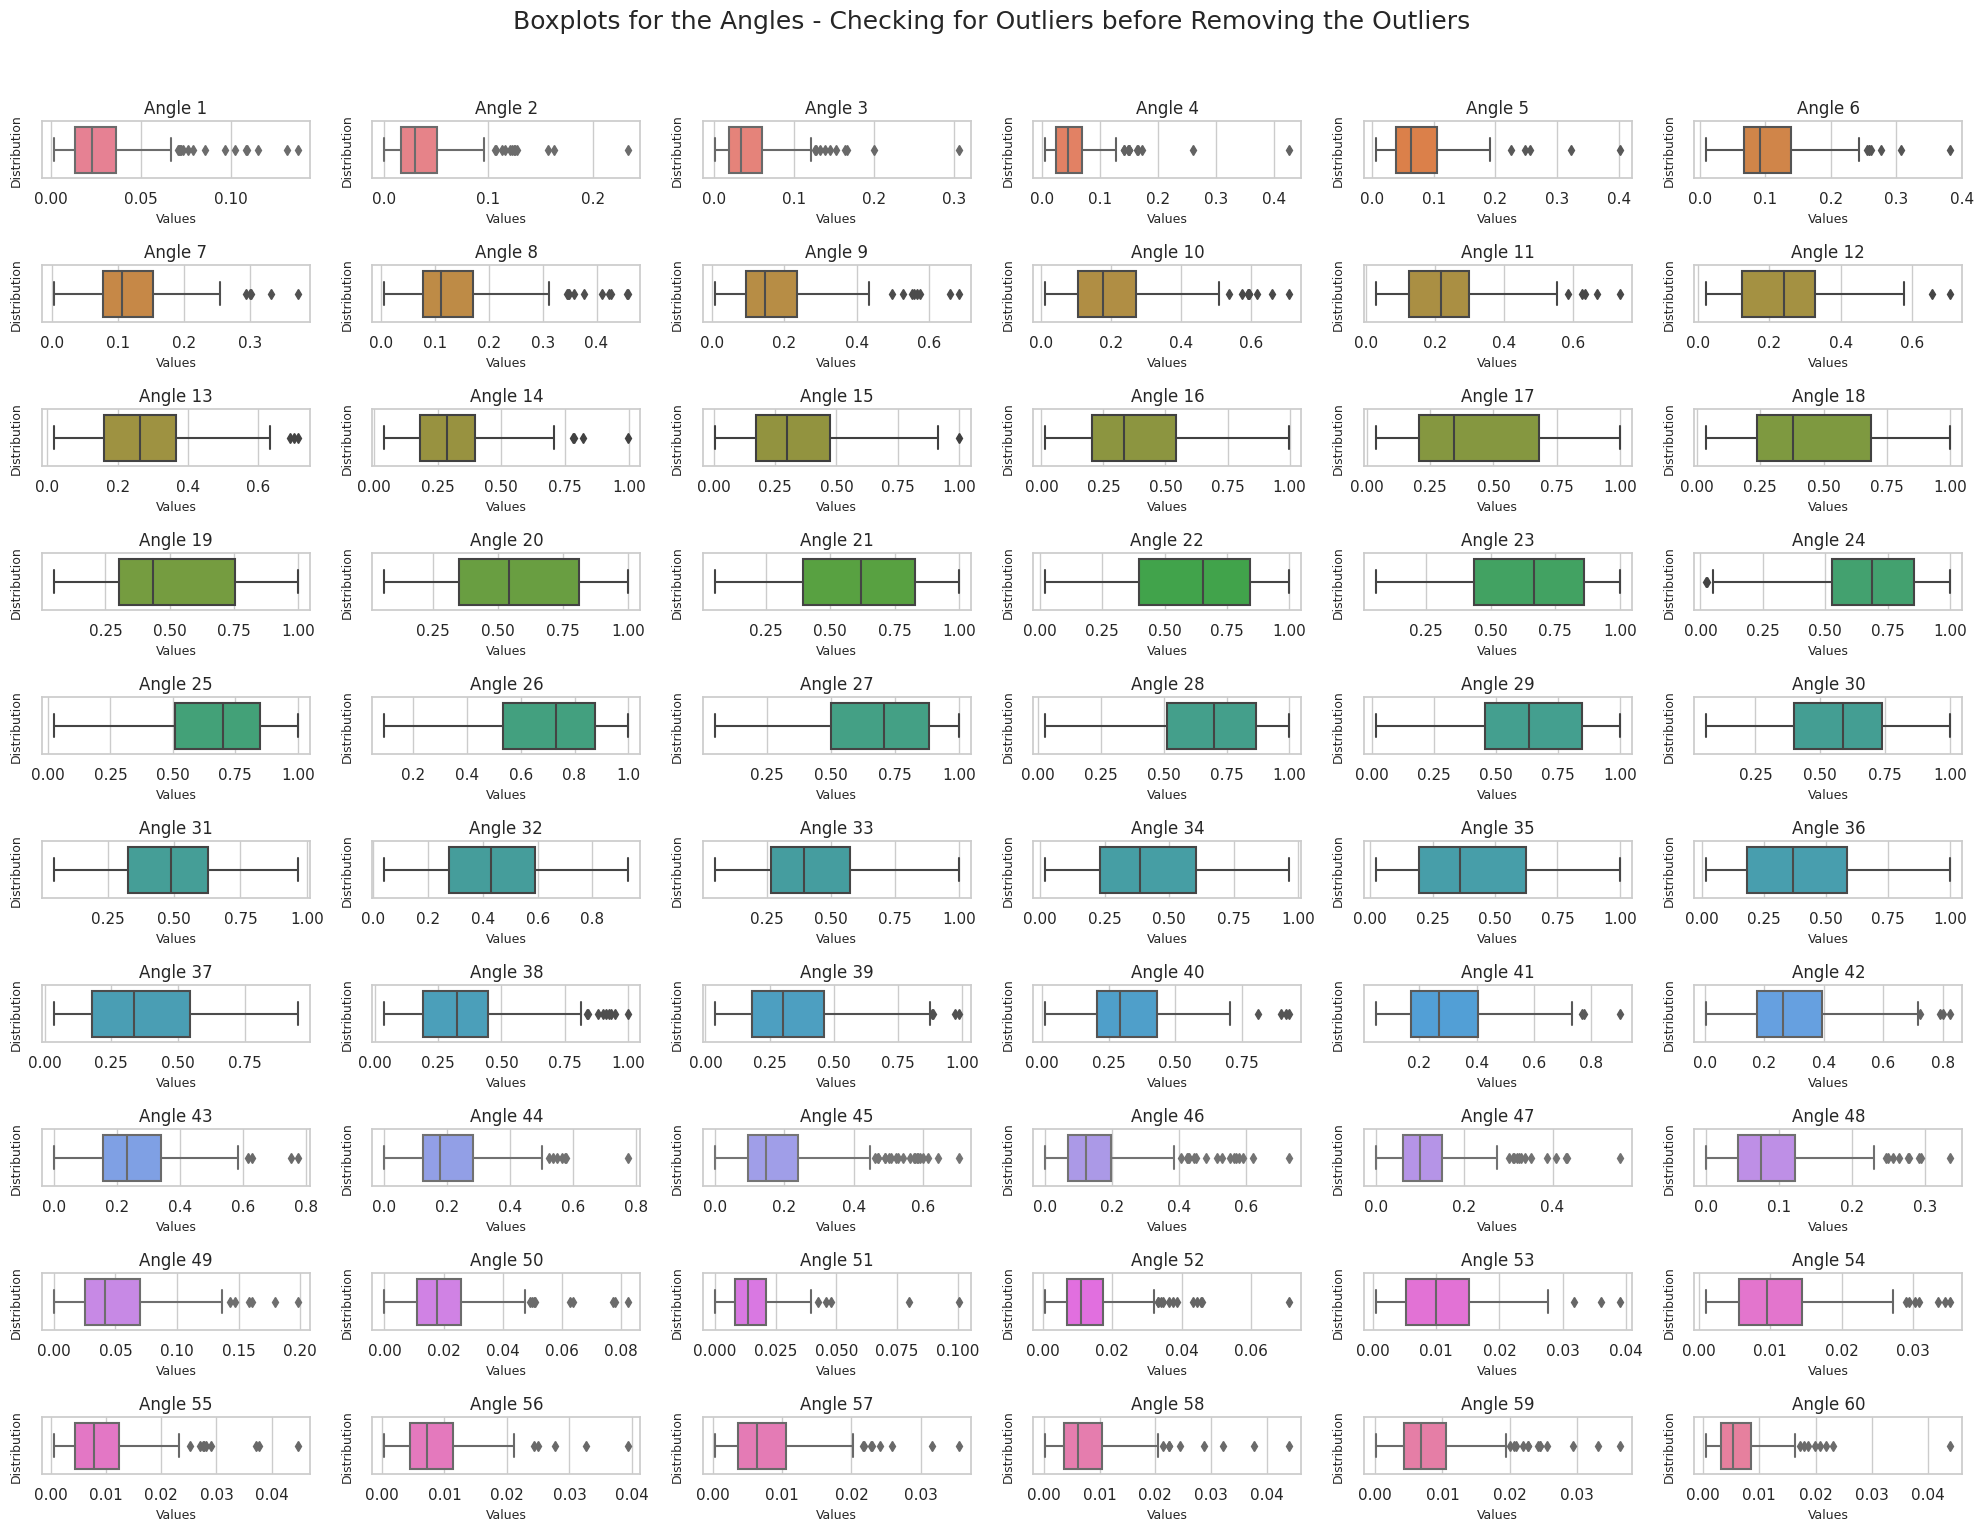

In [18]:
# Checking for outliers using boxplots for the angles before removing the outliers
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots for the Angles - Checking for Outliers before Removing the Outliers', fontsize=18, y=1.02)
colors = sns.color_palette("husl", 60)
for i in range(1, 61):
    plt.subplot(10, 6, i)
    sns.boxplot(x=balanced_sonar_data.iloc[:, i-1], color=colors[i-1])
    plt.title('Angle ' + str(i))
    plt.xlabel('Values', fontsize=9)
    plt.ylabel('Distribution', fontsize=9)
plt.tight_layout()
plt.show()

In [19]:
# Display the first 5 rows of the data
balanced_sonar_data

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
99,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
101,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077,R
93,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R


In [20]:
# Remove outliers using Z-score (threshold: 3)
z_scores = np.abs(stats.zscore(balanced_sonar_data.iloc[:, :-1]))
filtered_entries = (z_scores < 3).all(axis=1)
sonar_data_clean = balanced_sonar_data[filtered_entries]

In [21]:
# Display the first 5 rows of the cleaned data
sonar_data_clean

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
99,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
100,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
102,0.0587,0.1210,0.1268,0.1498,0.1436,0.0561,0.0832,0.0672,0.1372,0.2352,...,0.0331,0.0111,0.0088,0.0158,0.0122,0.0038,0.0101,0.0228,0.0124,M
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
104,0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,...,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077,R
93,0.0459,0.0437,0.0347,0.0456,0.0067,0.0890,0.1798,0.1741,0.1598,0.1408,...,0.0067,0.0032,0.0109,0.0164,0.0151,0.0070,0.0085,0.0117,0.0056,R
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
95,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,R


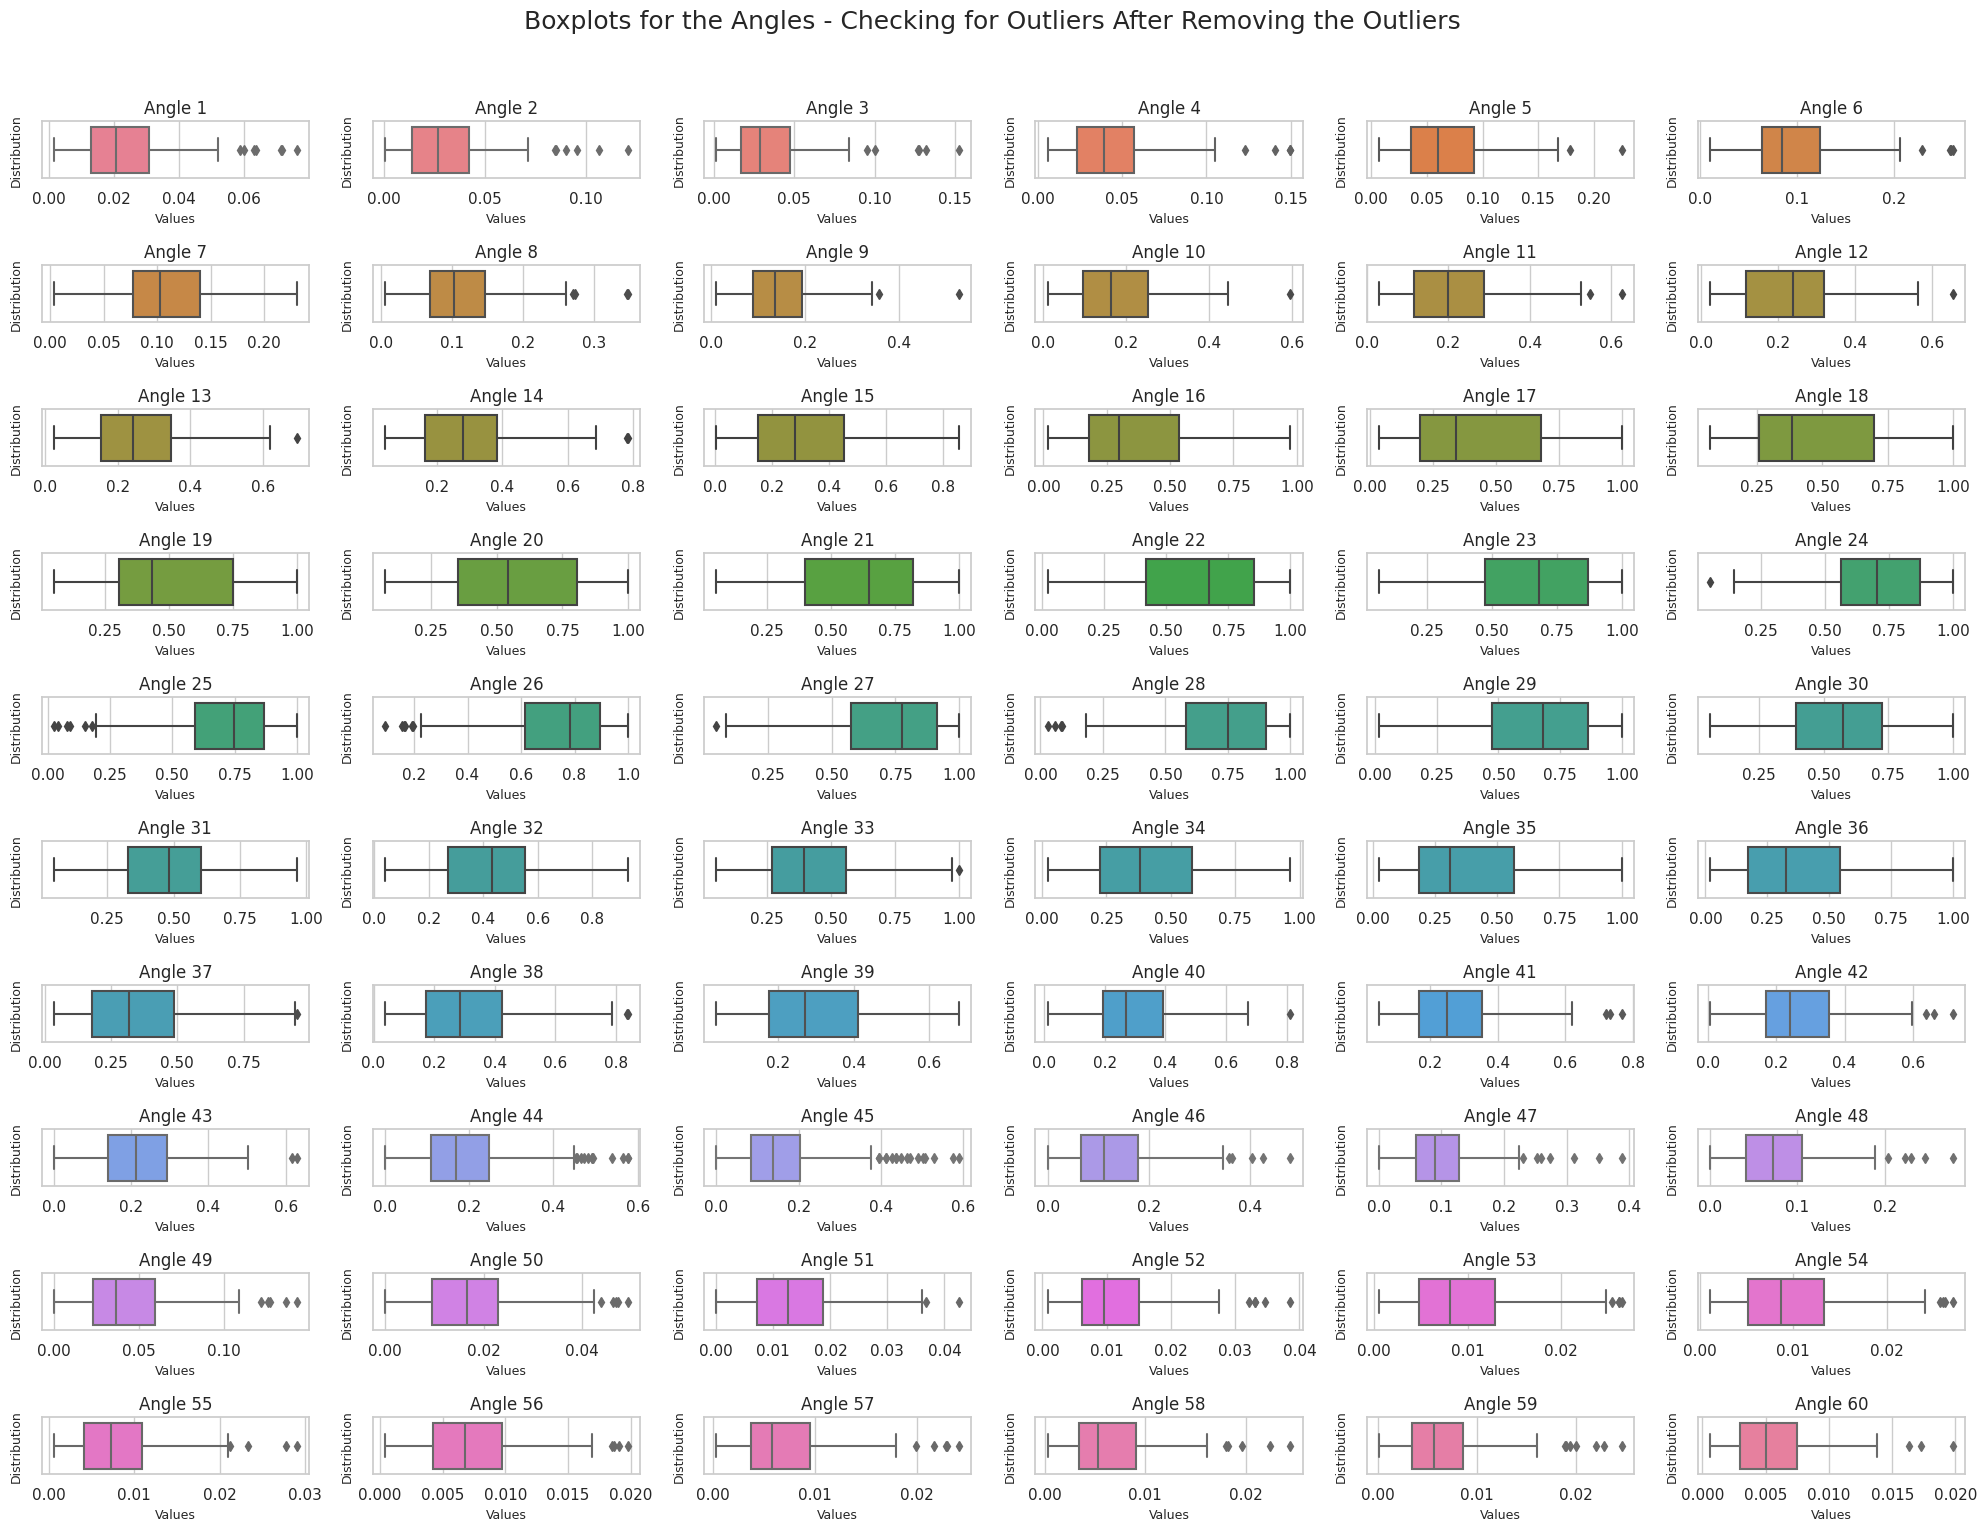

In [22]:
# Checking for outliers using boxplots for the angles after removing the outliers
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots for the Angles - Checking for Outliers After Removing the Outliers', fontsize=18, y=1.02)
colors = sns.color_palette("husl", 60)
for i in range(1, 61):
    plt.subplot(10, 6, i)
    sns.boxplot(x=sonar_data_clean.iloc[:, i-1], color=colors[i-1])
    plt.title('Angle ' + str(i))
    plt.xlabel('Values', fontsize=9)
    plt.ylabel('Distribution', fontsize=9)
plt.tight_layout()
plt.show()

In [23]:
# Comparing outliers before removing outliers and after removing outliers
z_before = np.abs(stats.zscore(balanced_sonar_data.iloc[:, :-1]))
outliers_before = (z_before > 3).sum(axis=0)
z_after = np.abs(stats.zscore(sonar_data_clean.iloc[:, :-1]))
outliers_after = (z_after > 3).sum(axis=0)
outliers_df = pd.DataFrame({
    'Outliers Before': outliers_before,
    'Outliers After': outliers_after
})
outliers_df

,Outliers Before,Outliers After
Angle 1,6,3
Angle 2,3,3
Angle 3,4,4
Angle 4,2,3
Angle 5,4,1
Angle 6,2,3
Angle 7,2,0
Angle 8,5,2
Angle 9,6,1
Angle 10,3,1


In [24]:
# Feature Scaling using StandardScaler from sklearn
scaler = StandardScaler()
sonar_data_scaled = sonar_data_clean.copy()
sonar_data_scaled.iloc[:, :-1] = scaler.fit_transform(sonar_data_clean.iloc[:, :-1])

In [25]:
# Display the first 5 rows of the scaled data
sonar_data_scaled

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
99,-0.230462,0.555355,0.756059,1.222718,-0.130636,-0.181487,0.218116,2.575634,-0.378335,-1.459547,...,1.048555,1.421852,1.027899,3.714549,0.365198,3.670794,3.636934,2.668255,1.114385,M
100,2.805455,3.512669,4.408471,2.817316,1.825744,0.454219,-0.442906,-0.371533,0.675317,1.707176,...,-0.363030,2.741635,0.166865,0.985512,2.622911,3.413680,-0.170169,0.991022,2.094530,M
102,2.507538,4.180599,3.439003,3.779081,1.823349,-0.799257,-0.551338,-0.756302,-0.184211,0.518939,...,2.986025,0.250546,-0.164301,1.344595,1.110011,-0.700153,0.832900,3.495981,1.898501,M
103,-0.507100,-0.227735,-0.341168,-0.196689,-0.070772,-0.976617,-0.084244,0.416015,-1.089346,-0.452648,...,-0.612133,-0.227875,2.220099,2.062763,-0.007208,-0.764432,0.810103,-0.424824,-1.041935,M
104,0.521424,1.015996,1.128063,0.285981,-0.152188,-0.767372,-0.899574,-0.769401,-0.081301,0.938878,...,2.847634,1.537333,0.647057,3.481145,1.808272,-0.400186,1.288841,1.230627,-0.033786,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.188040,-0.508726,-0.371229,-1.358673,-0.772387,-0.520264,0.347401,-0.088278,-0.007628,-0.170143,...,0.038303,0.399021,-0.776960,-0.235374,-1.380456,-0.764432,-1.287223,-0.511953,0.582306,R
93,1.599600,0.619844,-0.021770,0.053584,-1.454845,-0.143624,1.463006,0.993987,0.080079,-0.382021,...,-0.667490,-1.052739,0.183424,1.452321,1.784997,-0.014515,0.468148,1.078151,-0.005782,R
94,-1.478877,0.030224,-0.683112,-0.761592,-0.576030,0.521974,1.773707,0.863002,-0.188889,-0.361024,...,0.467314,-0.310362,-1.025335,0.554611,0.248821,0.649698,-1.104847,-0.860469,-1.181956,R
95,0.407931,0.449407,1.571463,1.315676,-0.367701,0.177218,-1.983900,-0.753027,-0.275426,-0.632076,...,-0.819719,2.329203,1.756466,-0.594458,1.459142,1.999549,0.376960,1.557361,1.534447,R


In [26]:
# Convert categorical values to numerical values
le = LabelEncoder()
label = le.fit_transform(sonar_data_scaled['Target'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [27]:
sonar_data_scaled.drop(columns='Target', axis=1, inplace=True)
sonar_data_scaled['Target'] = label
sonar_data_scaled

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60,Target
99,-0.230462,0.555355,0.756059,1.222718,-0.130636,-0.181487,0.218116,2.575634,-0.378335,-1.459547,...,1.048555,1.421852,1.027899,3.714549,0.365198,3.670794,3.636934,2.668255,1.114385,0
100,2.805455,3.512669,4.408471,2.817316,1.825744,0.454219,-0.442906,-0.371533,0.675317,1.707176,...,-0.363030,2.741635,0.166865,0.985512,2.622911,3.413680,-0.170169,0.991022,2.094530,0
102,2.507538,4.180599,3.439003,3.779081,1.823349,-0.799257,-0.551338,-0.756302,-0.184211,0.518939,...,2.986025,0.250546,-0.164301,1.344595,1.110011,-0.700153,0.832900,3.495981,1.898501,0
103,-0.507100,-0.227735,-0.341168,-0.196689,-0.070772,-0.976617,-0.084244,0.416015,-1.089346,-0.452648,...,-0.612133,-0.227875,2.220099,2.062763,-0.007208,-0.764432,0.810103,-0.424824,-1.041935,0
104,0.521424,1.015996,1.128063,0.285981,-0.152188,-0.767372,-0.899574,-0.769401,-0.081301,0.938878,...,2.847634,1.537333,0.647057,3.481145,1.808272,-0.400186,1.288841,1.230627,-0.033786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.188040,-0.508726,-0.371229,-1.358673,-0.772387,-0.520264,0.347401,-0.088278,-0.007628,-0.170143,...,0.038303,0.399021,-0.776960,-0.235374,-1.380456,-0.764432,-1.287223,-0.511953,0.582306,1
93,1.599600,0.619844,-0.021770,0.053584,-1.454845,-0.143624,1.463006,0.993987,0.080079,-0.382021,...,-0.667490,-1.052739,0.183424,1.452321,1.784997,-0.014515,0.468148,1.078151,-0.005782,1
94,-1.478877,0.030224,-0.683112,-0.761592,-0.576030,0.521974,1.773707,0.863002,-0.188889,-0.361024,...,0.467314,-0.310362,-1.025335,0.554611,0.248821,0.649698,-1.104847,-0.860469,-1.181956,1
95,0.407931,0.449407,1.571463,1.315676,-0.367701,0.177218,-1.983900,-0.753027,-0.275426,-0.632076,...,-0.819719,2.329203,1.756466,-0.594458,1.459142,1.999549,0.376960,1.557361,1.534447,1


In [28]:
# Calculate the correlation matrix
correlation_matrix = sonar_data_scaled.corr()
# Use seaborn to create a heatmap of the correlation matrix
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Data')
plt.show()

# # Calculate the correlation matrix
# correlation_matrix = sonar_data_scaled.corr().iloc[:10, :10]
# # Use seaborn to create a heatmap of the correlation matrix
# plt.figure(figsize=(10, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title('Top 10x10 Correlation Matrix for Data')
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Data Pre-processing and Model

In [29]:
# Separating data into predictor variables (angles) X and target variable Y
X = sonar_data_scaled.drop(columns='Target', axis=1)
Y = sonar_data_scaled['Target']

In [30]:
X

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 51,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60
99,-0.230462,0.555355,0.756059,1.222718,-0.130636,-0.181487,0.218116,2.575634,-0.378335,-1.459547,...,-0.660389,1.048555,1.421852,1.027899,3.714549,0.365198,3.670794,3.636934,2.668255,1.114385
100,2.805455,3.512669,4.408471,2.817316,1.825744,0.454219,-0.442906,-0.371533,0.675317,1.707176,...,1.393821,-0.363030,2.741635,0.166865,0.985512,2.622911,3.413680,-0.170169,0.991022,2.094530
102,2.507538,4.180599,3.439003,3.779081,1.823349,-0.799257,-0.551338,-0.756302,-0.184211,0.518939,...,0.903611,2.986025,0.250546,-0.164301,1.344595,1.110011,-0.700153,0.832900,3.495981,1.898501
103,-0.507100,-0.227735,-0.341168,-0.196689,-0.070772,-0.976617,-0.084244,0.416015,-1.089346,-0.452648,...,-0.006777,-0.612133,-0.227875,2.220099,2.062763,-0.007208,-0.764432,0.810103,-0.424824,-1.041935
104,0.521424,1.015996,1.128063,0.285981,-0.152188,-0.767372,-0.899574,-0.769401,-0.081301,0.938878,...,-0.870479,2.847634,1.537333,0.647057,3.481145,1.808272,-0.400186,1.288841,1.230627,-0.033786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.188040,-0.508726,-0.371229,-1.358673,-0.772387,-0.520264,0.347401,-0.088278,-0.007628,-0.170143,...,-0.065135,0.038303,0.399021,-0.776960,-0.235374,-1.380456,-0.764432,-1.287223,-0.511953,0.582306
93,1.599600,0.619844,-0.021770,0.053584,-1.454845,-0.143624,1.463006,0.993987,0.080079,-0.382021,...,-0.193523,-0.667490,-1.052739,0.183424,1.452321,1.784997,-0.014515,0.468148,1.078151,-0.005782
94,-1.478877,0.030224,-0.683112,-0.761592,-0.576030,0.521974,1.773707,0.863002,-0.188889,-0.361024,...,-0.345255,0.467314,-0.310362,-1.025335,0.554611,0.248821,0.649698,-1.104847,-0.860469,-1.181956
95,0.407931,0.449407,1.571463,1.315676,-0.367701,0.177218,-1.983900,-0.753027,-0.275426,-0.632076,...,-1.605793,-0.819719,2.329203,1.756466,-0.594458,1.459142,1.999549,0.376960,1.557361,1.534447


In [31]:
Y

99     0
100    0
102    0
103    0
104    0
      ..
92     1
93     1
94     1
95     1
96     1
Name: Target, Length: 155, dtype: int64

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [33]:
# Printing the shapes of the datasets (X, X_train, X_test)
print("Shape of the original dataset (X):", X.shape)
print("Shape of the training set (X_train):", X_train.shape)
print("Shape of the testing set (X_test):", X_test.shape)

Shape of the original dataset (X): (155, 60)
Shape of the training set (X_train): (124, 60)
Shape of the testing set (X_test): (31, 60)


In [34]:
X_train

,Angle 1,Angle 2,Angle 3,Angle 4,Angle 5,Angle 6,Angle 7,Angle 8,Angle 9,Angle 10,...,Angle 51,Angle 52,Angle 53,Angle 54,Angle 55,Angle 56,Angle 57,Angle 58,Angle 59,Angle 60
161,0.507237,0.278970,-0.521534,-0.765167,-0.523349,-0.592005,-0.328217,-0.265108,1.175830,1.258604,...,1.557224,1.173107,-0.425843,-0.462352,0.051893,0.341923,0.071190,-0.512124,-0.272348,-0.985927
164,-0.500007,-0.481087,-0.566626,-0.196689,0.185449,0.960391,0.814496,0.573198,1.067074,0.967510,...,-1.290658,-0.529099,-1.151723,-1.108127,-0.001969,-1.264079,0.285452,0.992479,0.337555,-0.649877
175,0.429211,-0.826568,-0.886024,-1.172755,-0.425171,0.071600,0.478772,-0.027697,1.700902,1.588829,...,-1.127255,-0.819719,0.135065,-0.313326,-1.240809,-0.472716,-1.192956,-1.332817,0.293990,-0.369836
35,-0.194996,-0.785110,0.677148,0.457597,-0.065983,0.936478,0.516306,1.485182,0.048505,-0.224544,...,1.977403,3.747174,0.844448,-1.323385,0.303252,0.504851,0.135469,2.633865,0.903893,0.386277
100,2.805455,3.512669,4.408471,2.817316,1.825744,0.454219,-0.442906,-0.371533,0.675317,1.707176,...,1.393821,-0.363030,2.741635,0.166865,0.985512,2.622911,3.413680,-0.170169,0.991022,2.094530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-0.230462,-0.633099,-0.033043,-0.396908,-0.664630,-1.034408,-0.859954,-0.378082,0.244968,0.727954,...,-0.146837,-0.847397,-0.640307,0.647057,0.464840,-0.914948,-0.314482,0.924088,0.315772,-0.565865
171,-0.386514,-0.766685,0.207445,0.686418,-0.188107,-0.307034,2.071897,3.816718,4.381225,3.967212,...,-0.602031,0.107498,-0.590815,1.474974,0.500748,1.203112,0.221174,2.063939,2.014788,0.806339
106,0.691662,0.555355,0.455448,1.347854,0.384200,-0.410660,-1.506379,-0.283118,-1.147817,-1.541626,...,-0.053464,-0.515260,1.289874,1.292832,-0.809908,1.272939,-0.100219,-0.466530,1.448449,1.002368
17,-0.294302,1.402934,0.094716,1.190540,1.708409,-0.305041,-1.101842,-1.498006,-0.575968,-0.593900,...,2.596000,2.986025,0.580491,0.365565,0.446886,-1.170977,-0.550170,-0.626109,0.969240,0.526297


In [35]:
Y_train

161    0
164    0
175    0
35     1
100    0
      ..
177    0
171    0
106    0
17     1
18     1
Name: Target, Length: 124, dtype: int64

In [36]:
k_best = 6  # Number of features to select
selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)
# Now, X_train_selected and X_test_selected contain the selected features

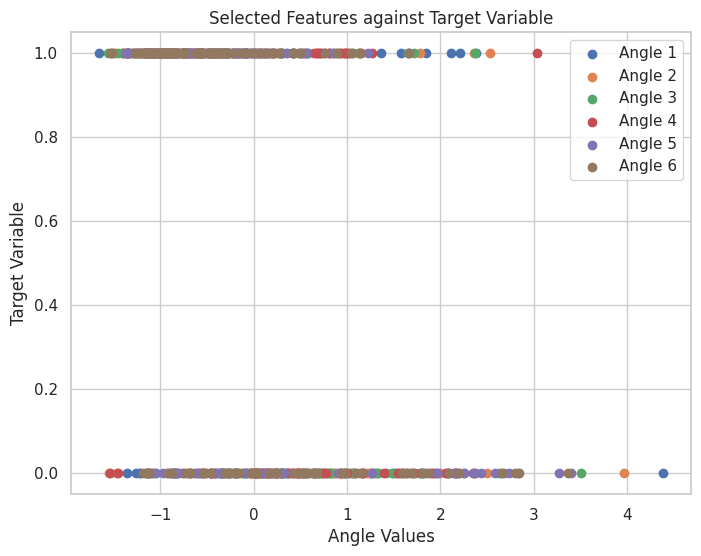

In [37]:
# Plotting scatter plots for each angle in X_train_selected against Y_train
plt.figure(figsize=(8, 6))
num_selected_features = X_train_selected.shape[1]
for i in range(num_selected_features):
    plt.scatter(X_train_selected[:, i], Y_train, label=f'Angle {i+1}')
plt.xlabel('Angle Values')
plt.ylabel('Target Variable')
plt.title('Selected Features against Target Variable')
plt.legend()
plt.show()

# Logistic Regression

In [38]:
# Creating a logistic regression model which is a linear model used for binary classification tasks
model = LogisticRegression()

In [39]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# Fit the grid search to the data
grid_search.fit(X_train_selected, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

### Prediction and Accuracy

In [40]:
# Making predictions on the training set using the trained logistic regression model
X_train_prediction = grid_search.predict(X_train_selected)
# Calculating the accuracy of the model on the training data that involves comparing the X_train_prediction with the Y_train
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [41]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7096774193548387


In [42]:
# Using cross-validation to evaluate the model
cross_val_scores = cross_val_score(grid_search, X_train_selected, Y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
# Calculate the mean cross-validation accuracy
cross_val_accuracy = cross_val_scores.mean()

In [43]:
print('Cross-Validation Accuracy : ', cross_val_accuracy)

Cross-Validation Accuracy :  0.6933333333333334


In [44]:
# Making predictions on the test set using the trained logistic regression model
X_test_prediction = grid_search.predict(X_test_selected)
# Calculating the accuracy of the model on the test data that involves comparing the X_test_prediction with the Y_test
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8064516129032258


In [46]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  5]
 [ 1 14]]


In [47]:
# Making predictions on new input data using the trained Logistic Regression model
new_input_data_logistic_regression = (0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664, 0.1460, 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339, 0.8230, 0.9173, 0.9975, 0.9911, 0.8240, 0.6498, 0.5980, 0.4862, 0.3150, 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.2930, 0.2925, 0.3998, 0.3660, 0.3172, 0.4609, 0.4374, 0.1820, 0.3376, 0.6202, 0.4448, 0.1863, 0.1420, 0.0589, 0.0576, 0.0672, 0.0269, 0.0245, 0.0190, 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152, 0.0052, 0.0121, 0.0124, 0.0055)

# Converting input data to a NumPy array
new_input_data_as_numpy_array_logistic_regression = np.asarray(new_input_data_logistic_regression)

# Reshaping the input data to match the expected format for model prediction
new_input_data_reshaped_logistic_regression = new_input_data_as_numpy_array_logistic_regression.reshape(1, -1)

# Selecting the same number of features for the new input data
new_input_data_selected_logistic_regression = selector.transform(new_input_data_reshaped_logistic_regression)

# Making a prediction using the trained Logistic Regression classifier model
new_prediction_logistic_regression = grid_search.predict(new_input_data_selected_logistic_regression)

# Printing the raw prediction result
print("Raw Prediction for New Input Data (Logistic Regression):", new_prediction_logistic_regression)

# Mapping the prediction result to a human-readable output
if new_prediction_logistic_regression[0] == 1:
    print('The object is a Rock (Logistic Regression)')
else:
    print('The object is a Mine (Logistic Regression)')

Raw Prediction for New Input Data (Logistic Regression): [0]
The object is a Mine (Logistic Regression)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


# Descision Tree

In [48]:
# Creating a decision tree model
model = DecisionTreeClassifier()

In [49]:
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# Fit the grid search to the data
grid_search.fit(X_train_selected, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

### Prediction and Accuracy

In [50]:
# Making predictions on the training set using the trained decision tree model
X_train_prediction = grid_search.predict(X_train_selected)
# Calculating the accuracy of the model on the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.9919354838709677


In [51]:
# Using cross-validation to evaluate the model
cross_val_scores = cross_val_score(grid_search, X_train_selected, Y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
# Calculate the mean cross-validation accuracy
cross_val_accuracy = cross_val_scores.mean()
print('Cross-Validation Accuracy: ', cross_val_accuracy)

Cross-Validation Accuracy:  0.6763333333333333


In [52]:
# Making predictions on the test set using the trained decision tree model
X_test_prediction = grid_search.predict(X_test_selected)
# Calculating the accuracy of the model on the test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8064516129032258


In [53]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11  5]
 [ 1 14]]


In [54]:
# Making predictions on new input data using the trained Decision Tree model
new_input_data_decision_tree = (0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664, 0.1460, 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339, 0.8230, 0.9173, 0.9975, 0.9911, 0.8240, 0.6498, 0.5980, 0.4862, 0.3150, 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.2930, 0.2925, 0.3998, 0.3660, 0.3172, 0.4609, 0.4374, 0.1820, 0.3376, 0.6202, 0.4448, 0.1863, 0.1420, 0.0589, 0.0576, 0.0672, 0.0269, 0.0245, 0.0190, 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152, 0.0052, 0.0121, 0.0124, 0.0055)

# Converting input data to a NumPy array
new_input_data_as_numpy_array_decision_tree = np.asarray(new_input_data_decision_tree)

# Reshaping the input data to match the expected format for model prediction
new_input_data_reshaped_decision_tree = new_input_data_as_numpy_array_decision_tree.reshape(1, -1)

# Selecting the same number of features for the new input data
new_input_data_selected_decision_tree = selector.transform(new_input_data_reshaped_decision_tree)

# Making a prediction using the trained Decision Tree classifier model
new_prediction_decision_tree = grid_search.predict(new_input_data_selected_decision_tree)

# Printing the raw prediction result
print("Raw Prediction for New Input Data (Decision Tree):", new_prediction_decision_tree)

# Mapping the prediction result to a human-readable output
if new_prediction_decision_tree[0] == 1:
    print('The object is a Rock (Decision Tree)')
else:
    print('The object is a Mine (Decision Tree)')

Raw Prediction for New Input Data (Decision Tree): [0]
The object is a Mine (Decision Tree)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
